<a href="https://colab.research.google.com/github/Sharath670/Linear-Regression-Capstone-Proj-2-/blob/main/Capstone_Project_2(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

The main aim of this capstone project was to perform exploratory data analysis and create a linear regression model on a bike sharing dataset based on historical data. The dataset I used in this project has information about the number of bikes rented per hour, along with other characteristics such as the weather conditons, date, holiday information etc. 

This dataset consists of 8760 rows and 14 columns. Most of the columns in this dataset are numerical columns. This dataset has no duplicate values nor does it have any null values. Before performing EDA, I created 2 new columns to help me with my analysis namely 'months' and 'year'. I created these columns using the preexisting 'Date' column.

During EDA, some of the insights I found are:

1. The frequency of 0-250 bikes being rented per hour is the highest whereas there is very less frequencty of 3500+ bikes being rented in an hour.

2. The highest number of bikes are rented at  6pm followed by that is 7pm. These are the times when people leave their office. In the mornings, most bikes are rented at 8am, this is the time where most people go to work, hence the high amount.

3. There is a relationship between Average Rented Bike Count and Temperature. As the temperature increases, the number of bikes rented increases, but it starts decreasing towards the end as the temperature gets too high.

4. There are a high number of bike rentals during the month of June, this could be due to the fact that it is summer time. There is a very low number of bookings during the months of December, January and February. This could be due to the fact that those are the winter months.

5. Summer has the most number of bike rentals whereas winter has the least.

6. There is a slight increase in rented bike count as visibility increases.

7. On average, more bikes are rented on non holidays as when compared to holidays, this could be due to the fact that people use bikes to commute to work on non holidays.

8. The month of January has the least number of bike rentals.

9. Only 3.5% of the bikes rented were on holidays.

10. Autumn has the highest average visibility.


The different charts I used for EDA are:



*  Histogram

*  Bar Chart

*  Scatter plot

*  Pie Chart 

*  Donut Chart

*  Correlation Heatmap

*  Pair Plot


After the EDA, I found some ouliers in the Rented Bike Count column and the Wind speed column. I used IQR (Inter Quartile Range) to treat these values.


Then, performed one hot encoding for the categorical columns 'Holiday', 'Functioning Day', 'Seasons', 'Month' and 'Hour'.

Next, I used VIF to check for multicollinearity among the variables. Using this information, I decided to drop the column 'Dew Point Temperature' since it was highly correlated with 'Temperature'.

I then performed square root transformation on the dependent variable since it had skewness. I did this so that it would resemble a normal distribution and I used MinMax scaler on the independent variables to make sure that they are on the same scale. 

After splitting the dataset, I created a few models.

1. Linear Regression model

2. Lasso regression model (with and without hyperparameter tuning)

3. Ridge regression model ( with and without hyperparameter tuning)

The metrics I used to evaluate these models are: R^2, Adjusted R^2, MSE, RMSE and MAE. I also used GRID Search CV on the Lasso and Ridge regression Models.

The final prediction model I chose from the above created models was the LASSO regression model(with hyperparameter tuning) since it was the best. 






 









# **GitHub Link -**

https://github.com/Sharath670/Linear-Regression-Capstone-Proj-2-

# **Problem Statement**


**Rental bike services are very commonly used in cities across the world since they are cost effective and are easily accessible. From the perspective of the bike sharing companies, one of the main goals is to make sure that there are enough bikes available as per the demand. Predicting the demand for the bikes is crucial for the companies as it would prepeare them ahead of time and also make sure that the supply does not fall short.**

**In this project, I will perform exploratory data analysis and create a Linear Regression model which can predict the demand for the bikes based on historical data.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statistics
import scipy.stats as stats
import math
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

### Dataset Loading

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
dataset=pd.read_csv('/content/drive/MyDrive/ALMA BETTER/SeoulBikeData.csv', encoding= 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
dataset.head() #Returns the first 5 rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
dataset.tail() #Returns the last 5 rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
dataset.shape

(8760, 14)

### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()


0

#### Missing Values/Null Values

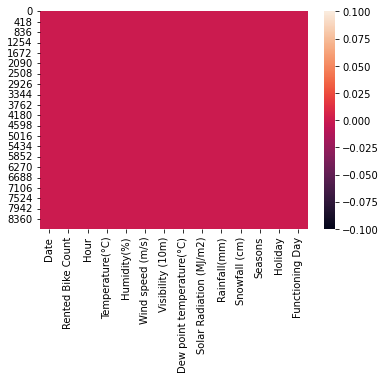

In [9]:
# Missing Values/Null Values Count

dataset.isna().sum()
sns.heatmap(dataset.isna()) # Visualizing duplicate values using heatmap.

### What did you know about your dataset?

This dataset contains data from a bike sharing company. This dataset gives us information about the number of bikes rented each hour and also gives us information about different characteristics of each hour.
This data can be used for forecasting the bike demand in the future.

This dataset has 8760 rows and 14 columns, it has no null values or duplicate values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

**Date** - Date

**Hour** - Hour of the day (0-23)

**Temperature** - Temperature of the day

**Humidity**- Humidity measure

**Windspeed** - Windspeed

**Visibility** - Visibility measure

**Dew Point Temperature** - Dew Point Temperature Measure

**Solar Radiation** - Solar Radiation Measure

**Rainfall** - Rainfall in mm

**Snowfall** - Snowfall measure

**Seasons** - 1= spring, 2= summer, 3= fall, 4 = winter

**Holiday** - Whether a holiday or not

**Functional Day** - Whether a functional day or not

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print("Number of unique values in ",i,"is",dataset[i].nunique())

Number of unique values in  Date is 365
Number of unique values in  Rented Bike Count is 2166
Number of unique values in  Hour is 24
Number of unique values in  Temperature(°C) is 546
Number of unique values in  Humidity(%) is 90
Number of unique values in  Wind speed (m/s) is 65
Number of unique values in  Visibility (10m) is 1789
Number of unique values in  Dew point temperature(°C) is 556
Number of unique values in  Solar Radiation (MJ/m2) is 345
Number of unique values in  Rainfall(mm) is 61
Number of unique values in  Snowfall (cm) is 51
Number of unique values in  Seasons is 4
Number of unique values in  Holiday is 2
Number of unique values in  Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df=dataset.copy()

In [14]:
#Average number of bikes rented per hour by season.
df.groupby('Seasons')['Rented Bike Count'].mean().sort_values(ascending=False).reset_index() 

,Seasons,Rented Bike Count
0,Summer,1034.073370
1,Autumn,819.597985
2,Spring,730.031250
3,Winter,225.541204


In [15]:
# Day which had the most number of bikes rented
df.groupby('Date')['Rented Bike Count'].sum().sort_values(ascending=False)[0:5].reset_index()

,Date,Rented Bike Count
0,13/06/2018,36149
1,19/06/2018,35349
2,08/06/2018,35103
3,20/06/2018,34639
4,21/06/2018,34621


In [16]:
# Which temperature do most people prefer riding bikes in?
df.groupby('Temperature(°C)')['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()[0:5]

,Temperature(°C),Rented Bike Count
0,23.4,45078
1,24.2,42243
2,25.0,39936
3,19.1,38835
4,20.6,38398


In [17]:
#Extracting month from date to create a new column called month
df['month']=df['Date'].apply(lambda x: x[3:5])

In [18]:
#Extracting year from date to create a new column called year
df['year']=df['Date'].apply(lambda x: x[6:10])


In [19]:
# Finding out which month has the highest number of Bikes rented
df['month']=df['month'].astype(int)
df.groupby('month')['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()

,month,Rented Bike Count
0,6,896887
1,7,734460
2,5,707088
3,9,673612
4,8,651887
5,10,650675
6,4,524227
7,11,465715
8,3,380594
9,12,185330


In [20]:
# Checking if more bikes are rented on holidays or non holidays
df.groupby('Holiday')['Rented Bike Count'].sum()



Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

In [21]:
# Percentage of bikes rented on non holidays 
(df.groupby('Holiday')['Rented Bike Count'].sum()[0]/df['Rented Bike Count'].sum())*100

3.497796774435001

In [22]:
# At what humidity percentage do people prefer to ride bikes?
df.groupby('Humidity(%)')['Rented Bike Count'].sum().sort_values(ascending=False)[0:5].reset_index()

,Humidity(%),Rented Bike Count
0,43,141773
1,53,140725
2,47,138105
3,56,134711
4,51,131966


In [23]:
# Finding out the preferred humidity and temperature for bike riding
df.groupby(['Humidity(%)','Temperature(°C)'])['Rented Bike Count'].sum().sort_values(ascending=False)[0:5].reset_index()

,Humidity(%),Temperature(°C),Rented Bike Count
0,43,28.4,8201
1,43,25.5,6494
2,41,27.8,6280
3,49,26.9,6002
4,57,25.6,5885


In [24]:
#Visibility in which people prefer to ride bikes
df.groupby('Visibility (10m)')['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()[0:5]

,Visibility (10m),Rented Bike Count
0,2000,1836690
1,1995,26276
2,1989,22383
3,1987,21544
4,1992,21405


In [25]:
df.groupby('Seasons')['Visibility (10m)'].mean().sort_values(ascending=False).reset_index()

,Seasons,Visibility (10m)
0,Autumn,1560.752289
1,Summer,1501.745471
2,Winter,1445.987037
3,Spring,1240.364583


### What all manipulations have you done and insights you found?

**Column creation**

I created a column called 'months' by taking the month value from the Date column using the lambda function and used the new column for further analysis.

I also created a column called 'year' by taking the year values from the date column.

I also created a copy of my original dataset.

**Insights found.**

1. People mostly prefer to ride bikes during the summer season and very low number of people prefer riding during the season of winter.

2.  13th of June had the most number of bikes rented since people prefer riding in the sumer vacations.

3. 23.4°C is the most preferred temperature for bike riding.

4. The month of June has the highest number of bike rentals whereas the month of January has the least.

5. Most number of bikes are rented when there is no holiday.

6. Only 3.5 percent of bikes were rented during holidays

7. 43% humidity is the humidity level which had the most bike rentals.

8. The preferred humidity along with temperature value for bike riding is is 43% and 28.4 degree.

9. Most people ride bikes when the visibility level is 2000.

10. Autumn has the highest average visibility.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 ( Univariate)

Histogram of Rented Bike Count

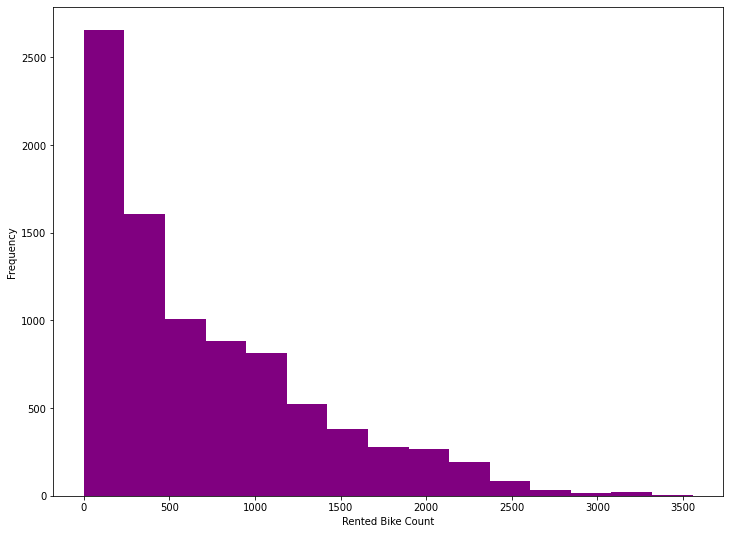

In [26]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 9)) # 
plt.hist(df['Rented Bike Count'],bins=15,color='purple')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows us the count of values that lie in different ranges. It is used to represent numerical data and is commonly used for performing univariate analysis.

##### 2. What is/are the insight(s) found from the chart?

From the chart, I can see that the frequency of 0-250 bikes being rented is the highest whereas there is very less frequencty of 3500+ bikes being rented in an hour.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Through this insight, the business should make sure that there are atleast 250 bikes available during all hours of the day, to meet the demand by the customers.

#### Chart - 2 (Bivariate)
Bar chart of Hour vs Rented Bike Count

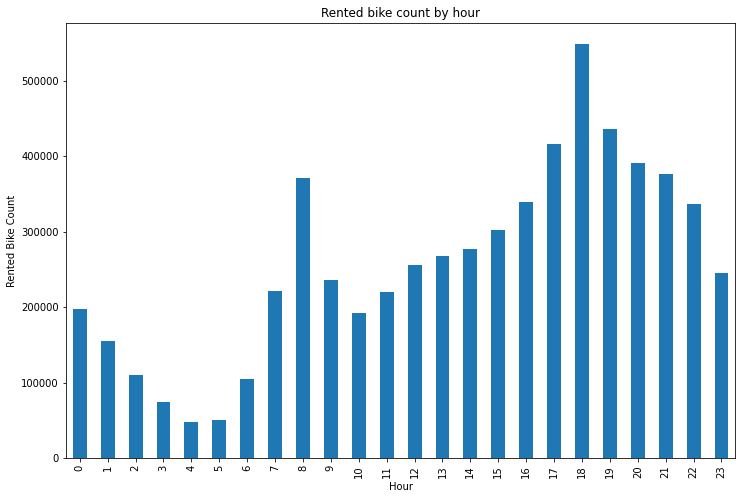

In [27]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 8))
df.groupby('Hour')['Rented Bike Count'].sum().plot.bar()
plt.ylabel("Rented Bike Count")
plt.title('Rented bike count by hour')
plt.show()

##### 1. Why did you pick the specific chart?

I used a bar chart since it is useful to represent categorical data, where the hight of the rectangular bars are proportional to the amount on the Y axis. Here, I plotted the 'Hour' variable on x axis and the sum of the bikes rented for each hour on the y axis.

##### 2. What is/are the insight(s) found from the chart?

From the chart, I can see that most bikes are rented at hour number 18, that is 6pm followed by hour number 19, that is 7pm. These are the times when people leave their office.
In the mornings, most bikes are rented at 8am, this is the time where most people go to work, hence the high amount.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Looking at the chart, the company must make sure that there are enough bikes available during the peak times. They can also add extra bikes at the peak times to keep up with the demand and not lose out on customers. 

#### Chart - 3 (Bivariate)
Scatter plot of Temperature vs Rented Bike Count

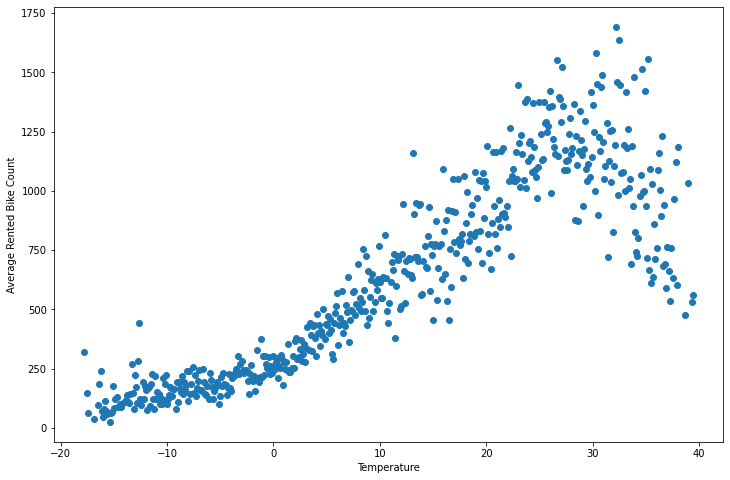

In [28]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 8))
q=df.groupby('Temperature(°C)')['Rented Bike Count'].mean().reset_index()
plt.scatter(x=q['Temperature(°C)'], y=q['Rented Bike Count'])
plt.xlabel('Temperature')
plt.ylabel('Average Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatterplot which is commonly used to represent bivariate data.Through a scatterplot, we can also see how one variable affects the other. We can use this to come to certain conclusions about how the variables are related. 

##### 2. What is/are the insight(s) found from the chart?

From this scatterplot I can see that there is a relationship between Average Rented Bike Count and Temperature. As the temperature increases, the number of bikes rented increases, but it starts decreasing towards the end as the temperature gets too high.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can understand that people prefer to use their vehicles mostly when the weather is pleasant, not to cold or not too hot.
They can schedule the bike maintainance, replacement etc when the temperatures are too high or too low, since very few people use the bikes during those times.

#### Chart - 4 (Bivariate)
Pie chart of percentage of bookings across months

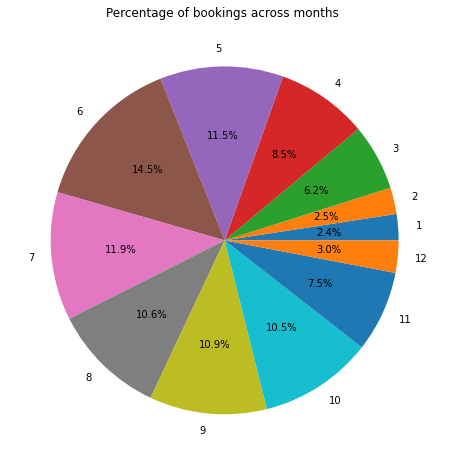

In [29]:
# Chart - 4 visualization code
q=df.groupby('month')['Rented Bike Count'].sum().reset_index()
w=q.iloc[:,1]
e=q.iloc[:,0]
plt.figure(figsize=(12, 8))
plt.pie(w, labels = e,autopct='%1.1f%%')
plt.title('Percentage of bookings across months ')
plt.show()

##### 1. Why did you pick the specific chart?

I used a pie chart for this visualization to clearly show the percentage of bike bookings across months.

A pie chart is a very simple visualization and easy to understand since different variables are represented using sectors that have different colours.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that there are a high number of bike rentals during the month of June, this could be due to the fact that it is summer time. There is a very low number of bookings during the months of December, January and February. This could be due to the fact that those are the winter months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Using this insight, the company can roll out extra bikes during the summer months since that is the peak, and can decrease the number of bikes available during the winter months, which can help to cut costs.

#### Chart - 5 (Bivariate)
Barplot of Seasons vs Rented Bike Count

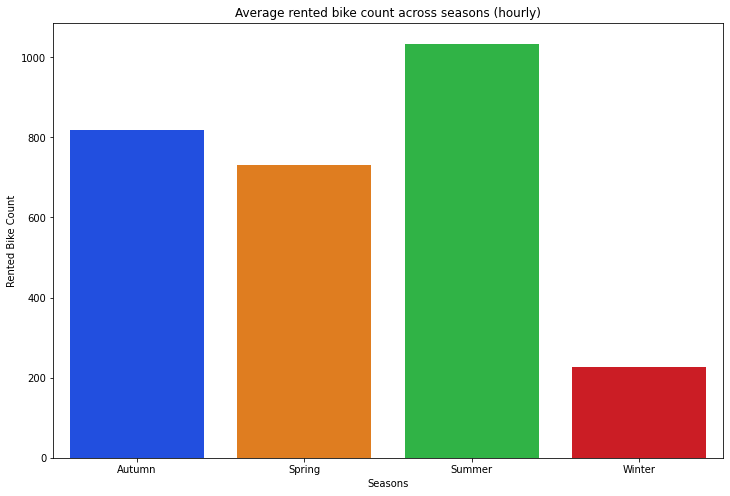

In [30]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 8))
q=df.groupby('Seasons')['Rented Bike Count'].mean().reset_index()
sns.set_palette("bright")
sns.barplot(x =q['Seasons'], y=q['Rented Bike Count'])
plt.title('Average rented bike count across seasons (hourly)')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a barchart from the seaborn library for this visualization. It can be used to represent categorical data and their corresponding values using rectangualar bars. Here, the different colours represent different seasons and the y axis represents the mean of the bike counts per hour.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that summer has the most number of bike rentals whereas winter has the least.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company must focus on making sure that there are sufficient amount of bikes available in the month of summer, and can take back many of their bikes during the month of winter for cost cutting.

#### Chart - 6 (Bivariate)
Scatterplot of Visibility vs Rented Bike Count

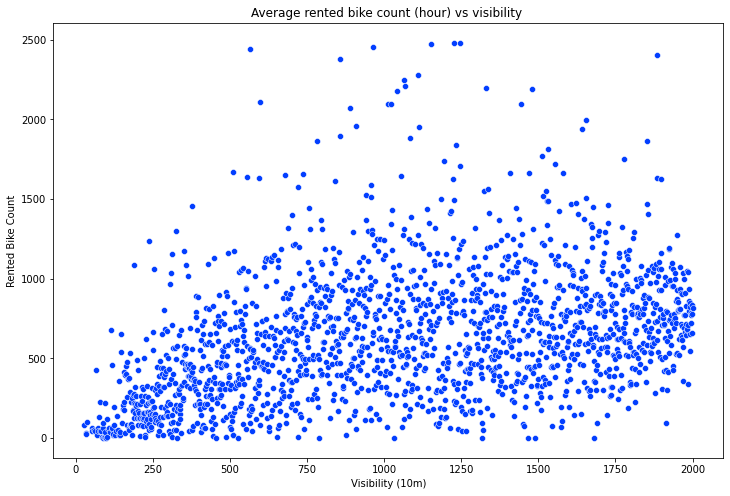

In [31]:
# Chart - 6 visualization code
q=df.groupby('Visibility (10m)')['Rented Bike Count'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(x =q['Visibility (10m)'], y=q['Rented Bike Count'])
plt.title('Average rented bike count (hour) vs visibility ')
plt.show()


##### 1. Why did you pick the specific chart?

I used a scatterplot from the seaborn library for this particular visualization. Through a scatterplot, we can also see how one variable affects the other. We can use this to come to certain conclusions about how the variables are related

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that there is a slight increase in rented bike count as visibility increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The businesses can see the weather forecast and be ready to supply bikes when the visibility increases as the number of customers will increase as well.

#### Chart - 7 (Bivariate) 
Donut Chart of Holidays with mean of Rented Bike Count

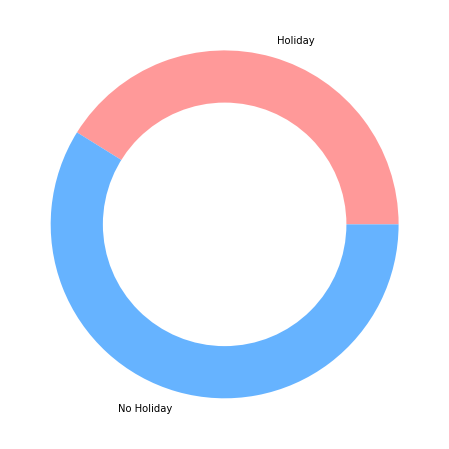

In [32]:
# Chart - 7 visualization code
plt.figure(figsize=(12,8))
q=df.groupby('Holiday')['Rented Bike Count'].mean().reset_index()
plt.pie(q['Rented Bike Count'], labels =q['Holiday'],colors=['#ff9999','#66b3ff'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### 1. Why did you pick the specific chart?

A Donut chart is essentially a Pie Chart with an area of the center cut out. I have used it to visualize the average number of bikes rented on holidays as compared to bikes rented on non holidays. 

##### 2. What is/are the insight(s) found from the chart?

I can see that, on average, more bikes are rented on non holidays as when compared to holidays, this could be due to the fact that people use bikes to commute to work on non holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Using information from the above chart, the company can make sure that there are sufficient bikes available during the week days, as week days have more demand than weekends.

#### Chart - 8 (Multivariate)
Pointplot


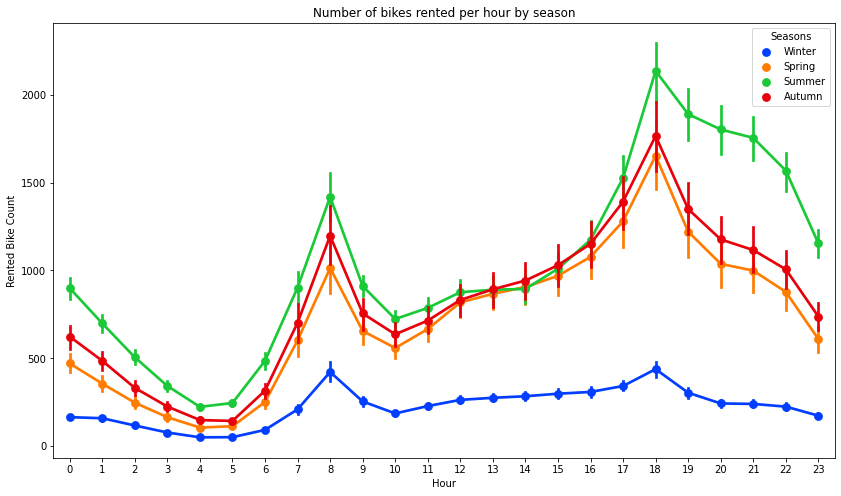

In [33]:
plt.figure(figsize=(14,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons')
plt.title('Number of bikes rented per hour by season')
plt.show()

##### 1. Why did you pick the specific chart?

Point plots can be useful for focusing comparisons between different levels of one or more categorical variables and can be used for multivariate analysis.

##### 2. What is/are the insight(s) found from the chart?



From this chart I can see that most people prefer to rent bikes at 6pm and summer seems to have the highest number of bike rentals.

#### Chart - 9- Correlation Heatmap

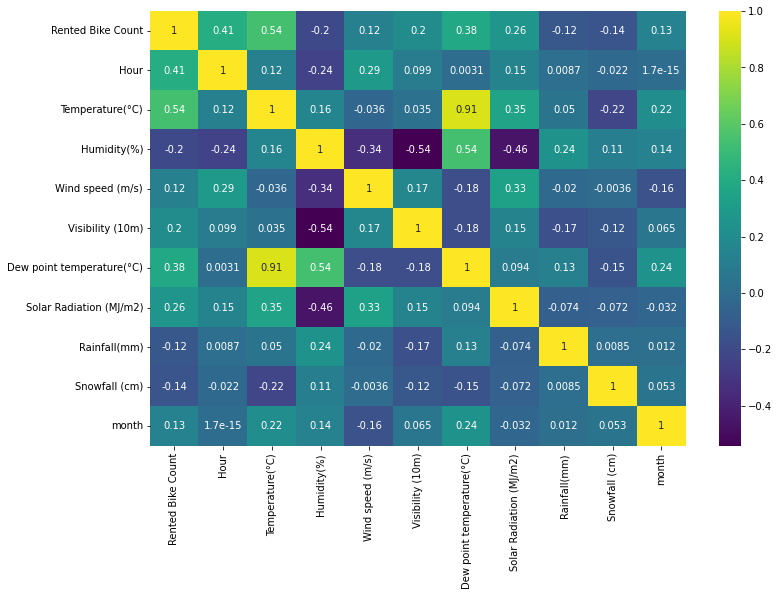

In [34]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

##### 1. Why did you pick the specific chart?

I used a correlation heatmap to visualize the correlations between the variables and to find out if there are any significant positive or negative relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

From this chart, the main correlations I can see are.
1. There is a moderate positive correlation between rented bike count and Hour.
2. There is a moderate positive correlation between rented bike count and Temperature.
3. There is a moderate positive correlation between rented bike count and Dew point temperature.
4. There is a high positive correlation between Temperature and Dew point temperature.
5. There is a moderate positive correlation between Temperature and Solar Radiation.
6. There is moderate negative correlation between humidity and visibility
7. There is moderate positive correlations between humidity and Dew point Temperature
8. There is moderate negative correlation between humidity and Solar radiation.
9. There is moderate negative correlation between humidity and Wind speed.
10. There is moderate positive correlation between Wind speed and Solar radiation. 

The remaining correlations can be seen using the chart.

#### Chart - 10 - Pair Plot 

<Figure size 864x576 with 0 Axes>

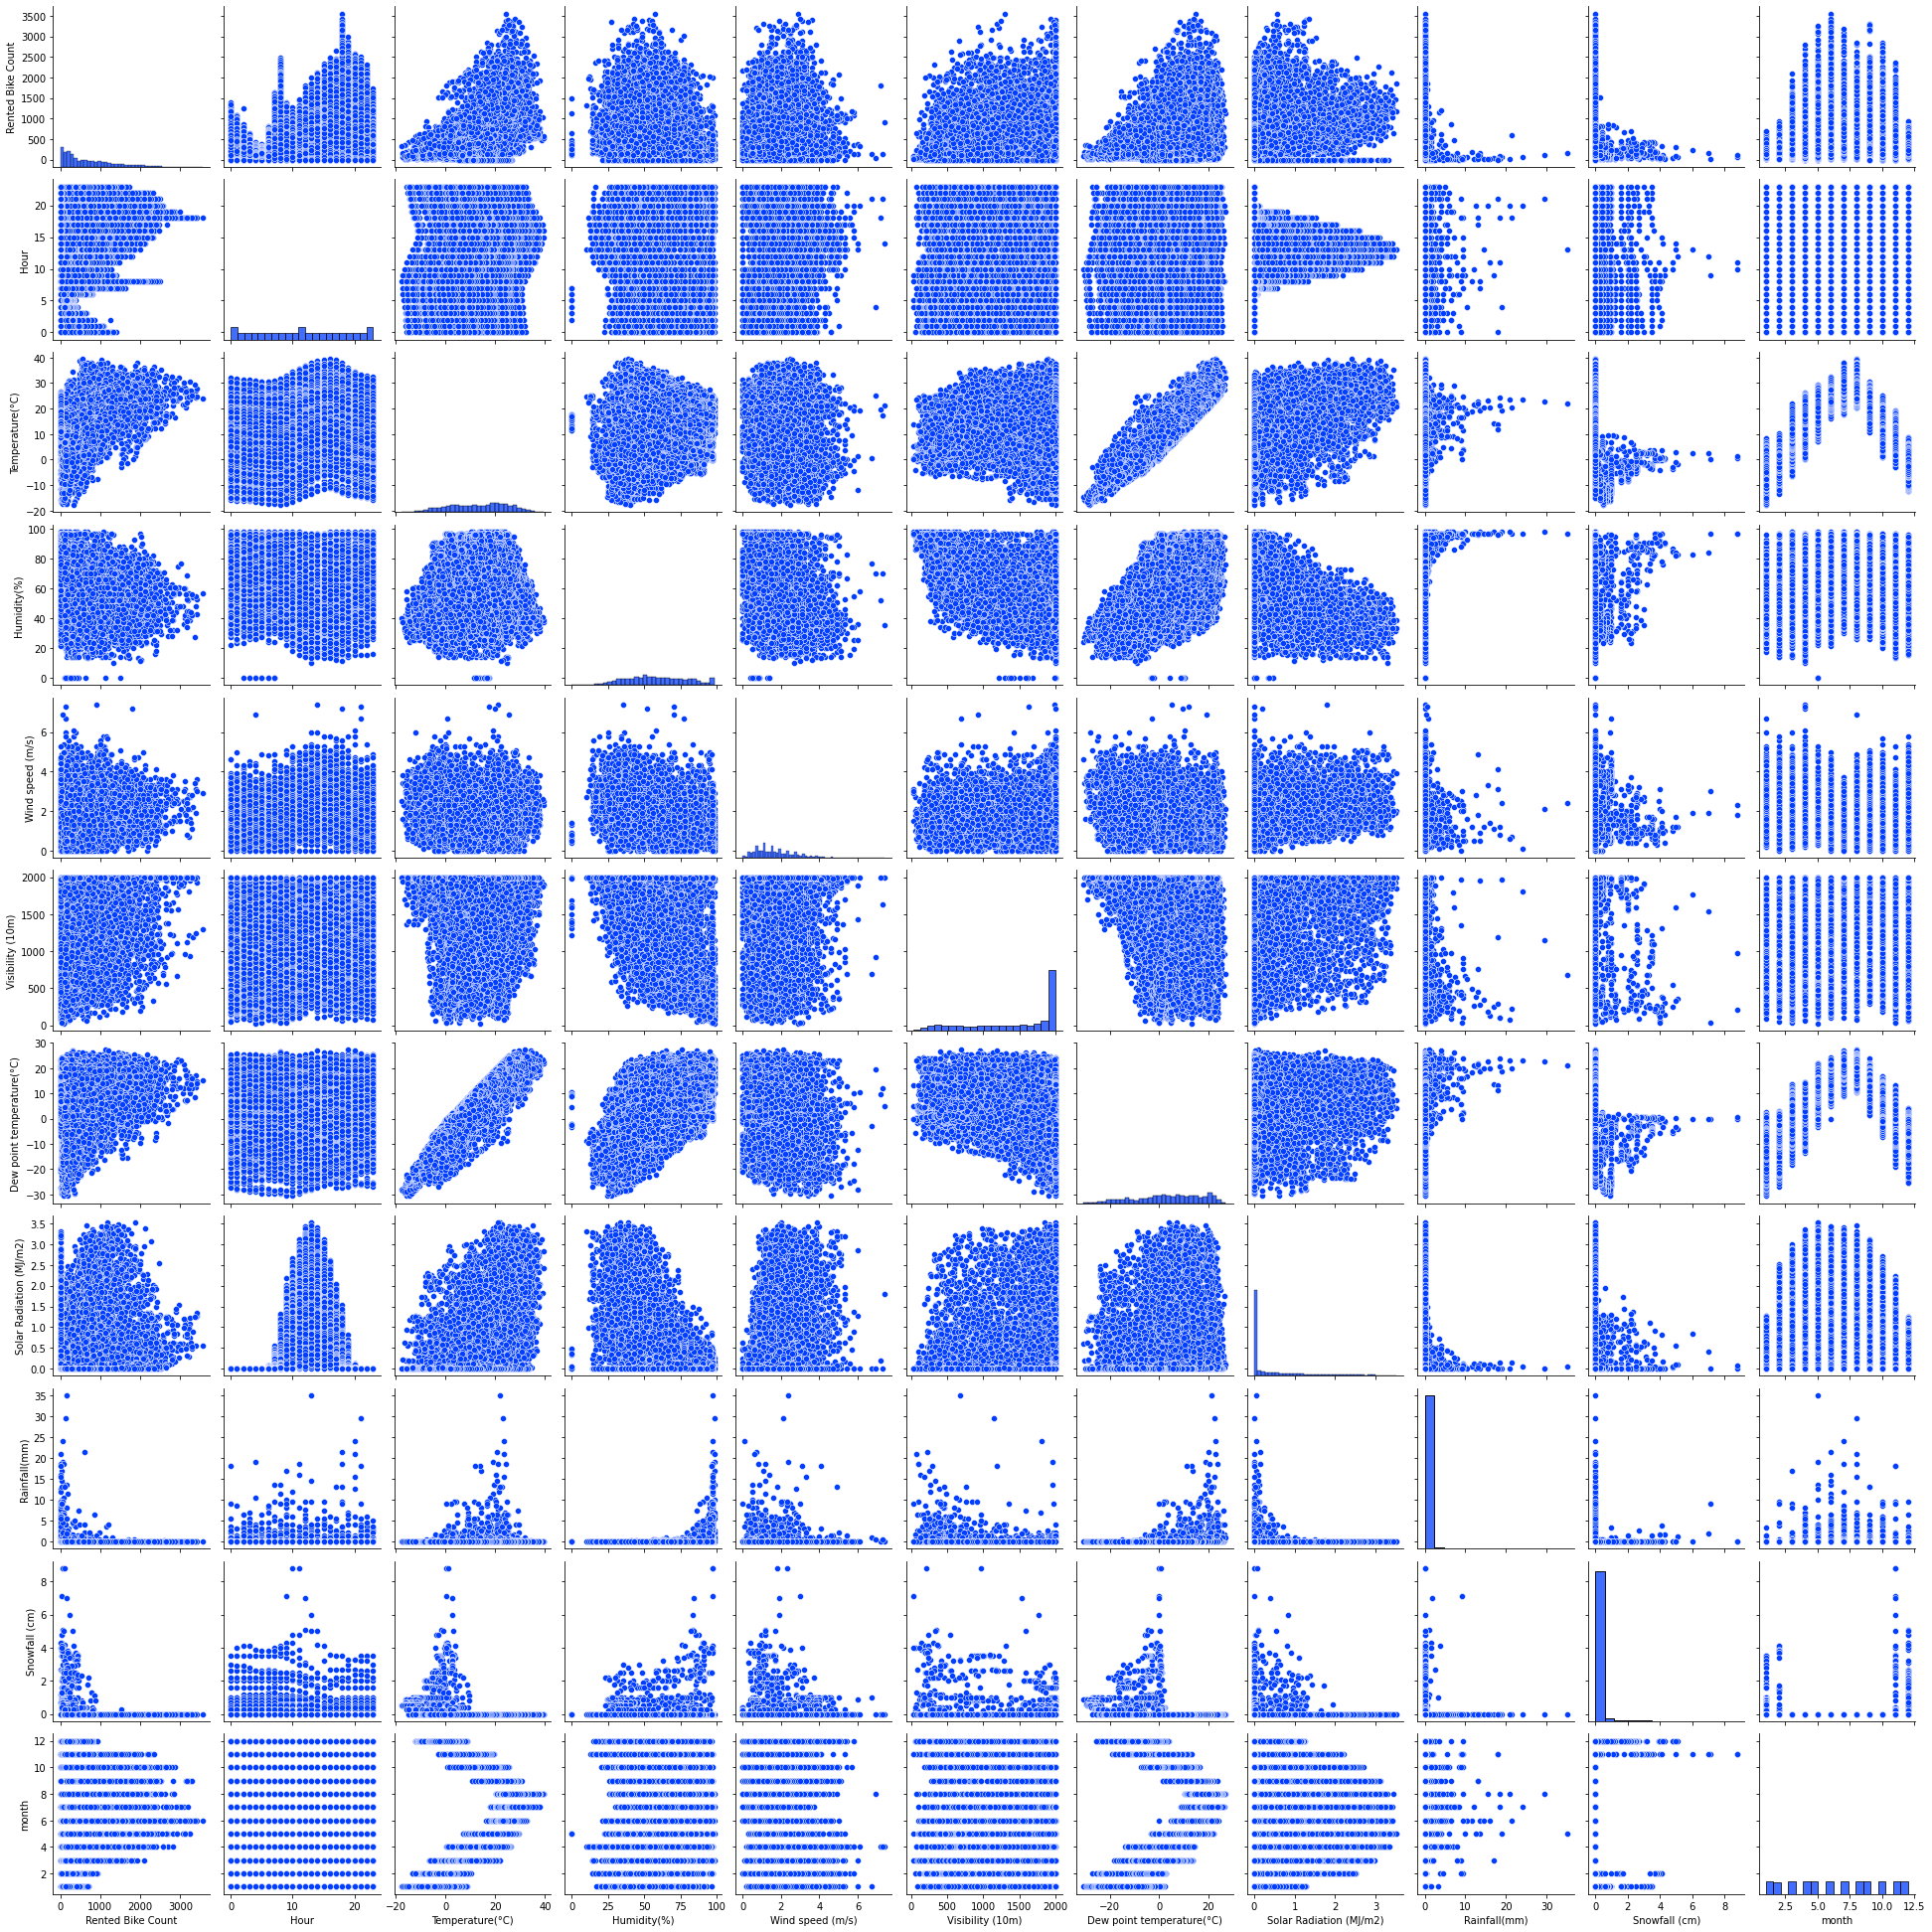

In [35]:
# Pair Plot visualization code
plt.figure(figsize=(12,8))
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

A pairplot shows you multiple bivariate distributions. It basically shows us the graphs of each bivariate distributions unlike a correlation heatmap which shows us only the values. We can look at each of these plots to check if there are any correlations.

##### 2. What is/are the insight(s) found from the chart?



The insights from this chart are pretty much similar to the insights obtained using the correlation heatmap, the same correlations we found using the heatmap can be visualized above in the pairplot. There aren't too many variables with high correlations.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average number of bikes rented per hour is 705.
2. The mean temperature is 10 degrees.
3. The average humidity is 50.

### Hypothetical Statement - 1
 The average number of bikes rented per hour is 700.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean=700

Alternate Hypothesis: mean !=700

Type of test: 2 tailed test

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
sample= df.sample(30).iloc[:,1].reset_index()
sample_mean=sample['Rented Bike Count'].mean()
population_sd= df['Rented Bike Count'].std()
x_bar =sample_mean
s =population_sd
mu_null = 700
n = 30
print((x_bar - mu_null)/(s/math.sqrt(n)))

0.8316357579876112


In [37]:
# P value
print(2*(1-stats.t.cdf(0.90, 29)))

0.3755334391787537


Since p is greater than 0.05 , we fail to reject the null hypothesis.

##### Which statistical test have you done to obtain P-Value?

I used the t test to obtain the p-value and have gotten a result which says that the null hypothesis cannot be rejected. 

##### Why did you choose the specific statistical test?

I chose t-test since the population standard deviation is known and the sample size is not greater than 30.

### Hypothetical Statement - 2
The mean temperature is 10 degrees.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean = 10

Alternate Hypothesis: mean != 10

Type : Two tailed test

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
sample=df.sample(30).iloc[:,3].reset_index()
sample_mean=sample['Temperature(°C)'].mean()
population_sd= df['Temperature(°C)'].std()
x_bar =sample_mean
s =population_sd
mu_null = 10
n = 30
print((x_bar - mu_null)/(s/math.sqrt(n)))

1.825004331909727


In [39]:
# P value
print(2*(1-stats.t.cdf(1.209, 29)))

0.23642798313706792


##### Which statistical test have you done to obtain P-Value?

I used t test to obtain P value. Since the value is more than 0.05, I have failed to reject the null hypothesis.

##### Why did you choose the specific statistical test?

I chose t test since the sample size was 30 and the population standard deviation is known.

### Hypothetical Statement - 3

The average humidity is 50.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean = 50

Alternate Hypothesis: mean != 50

Type : Two tailed test

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
sample=df.sample(30).iloc[:,4].reset_index()
sample_mean=sample['Humidity(%)'].mean()
population_sd= df['Humidity(%)'].std()
x_bar =sample_mean
s =population_sd
mu_null = 50
n = 30
print((x_bar - mu_null)/(s/math.sqrt(n)))


2.3760523141218095


In [41]:
# P value
print(2*(1-stats.t.cdf(2.47, 29)))

0.01963693701455238


##### Which statistical test have you done to obtain P-Value?

I performed t- test to obtain p value. The value of p I got is less than 0.05, hence I can reject the null hypothesis.

##### Why did you choose the specific statistical test?

I chose t test since the sample size was 30 and the population standard deviation is known.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

I did not use any missing value imputation technique since there are no missing values in the dataset.

### 2. Handling Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

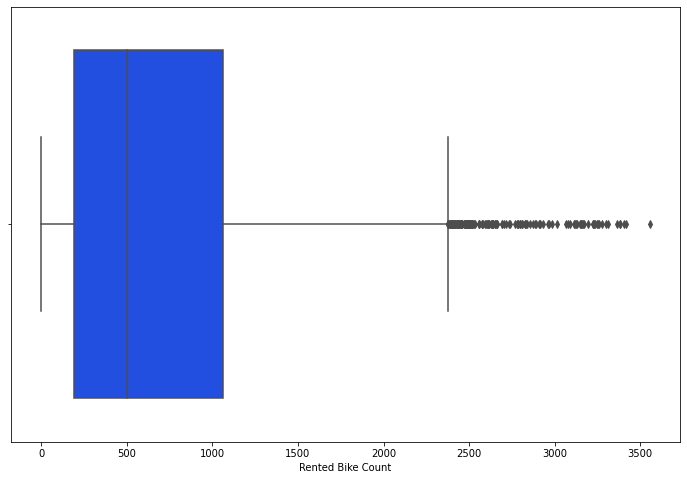

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

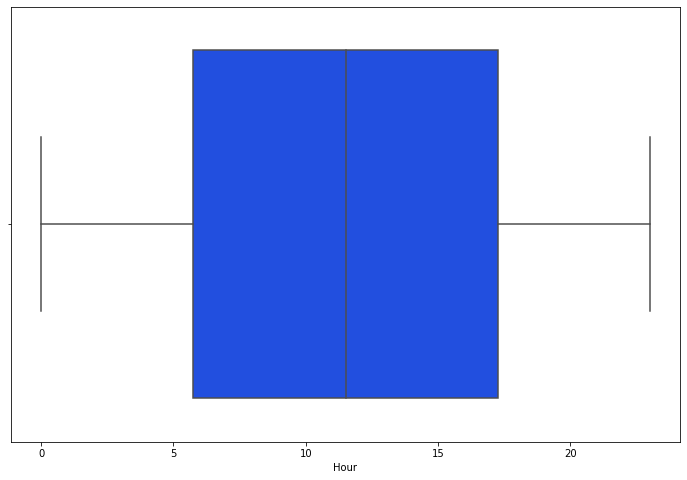

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

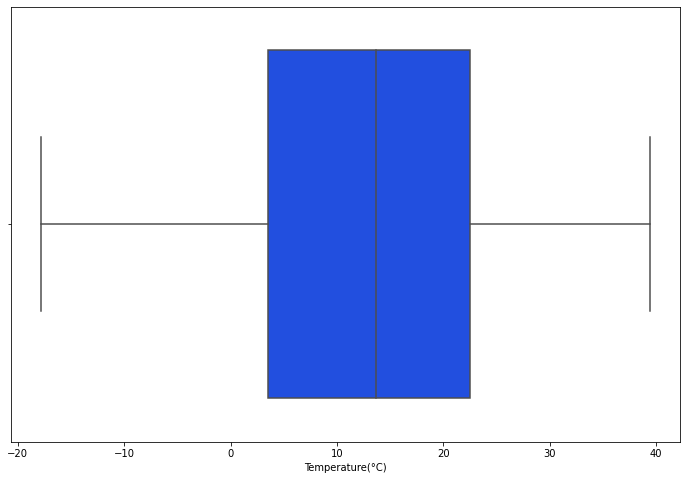

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

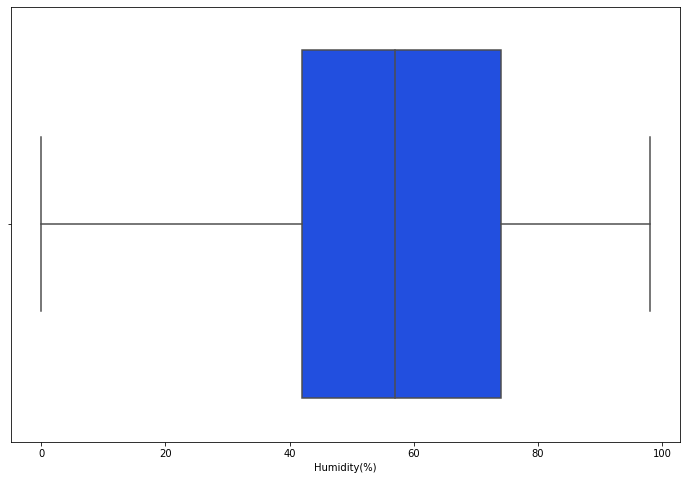

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

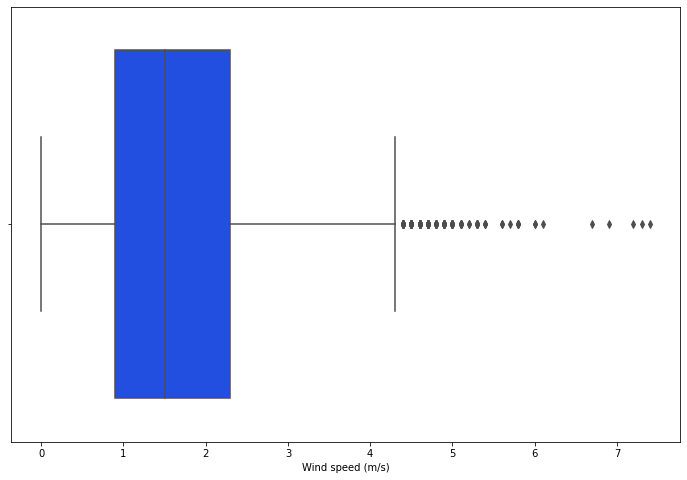

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

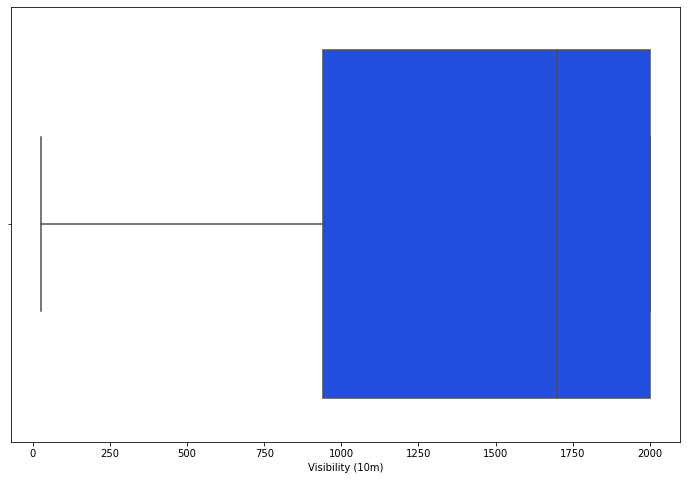

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

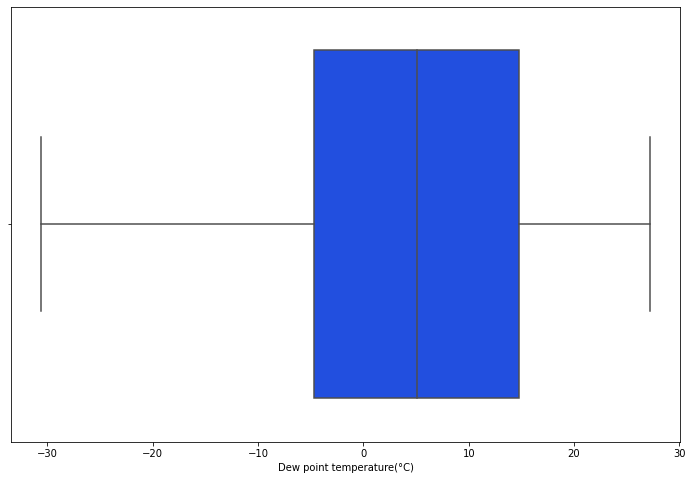

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

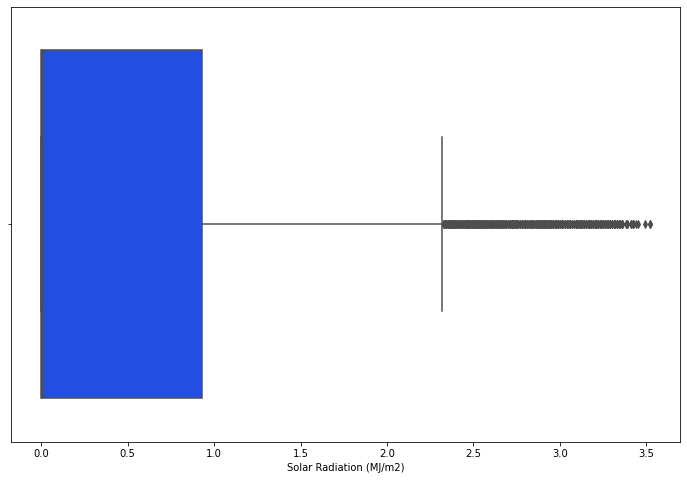

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

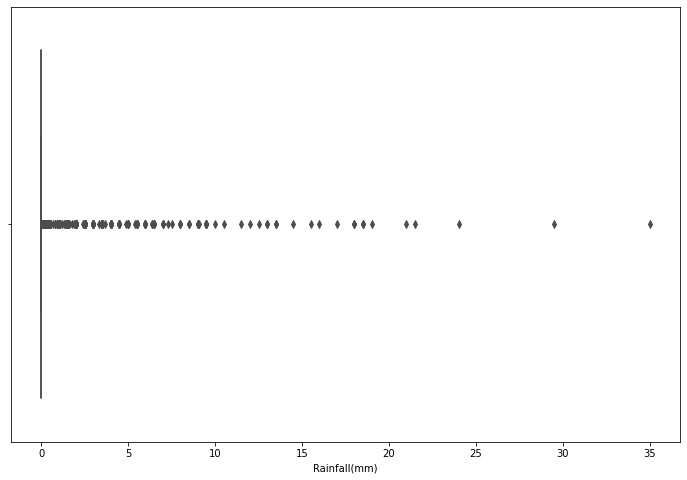

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

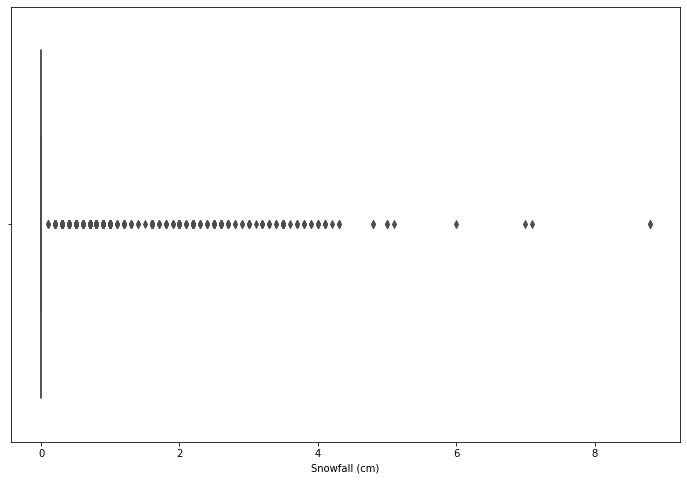

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

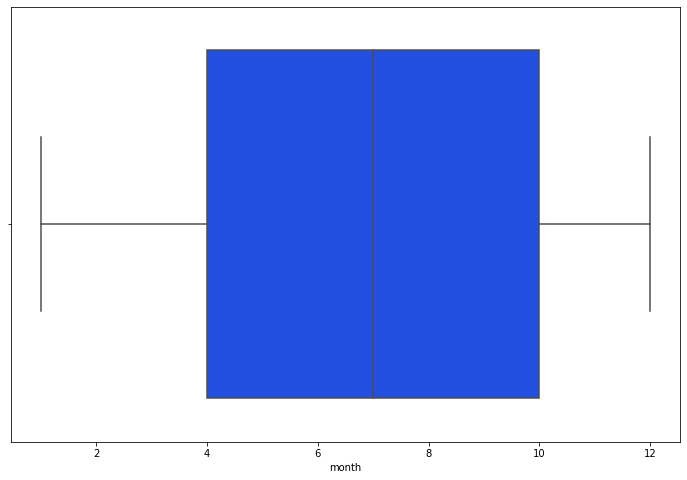

In [43]:
# Handling Outliers & Outlier treatments4
numerical=df.describe().columns.values
for i in numerical:
  plt.figure() # plots figure for each iteration
  plt.figure(figsize=(12,8))  
  sns.boxplot(df[i])
  plt.show()
# There are outliers in the columns  Rented Bike Count, Wind Speed, and Solar Radiation.


  
  

In [44]:
#Removing outliers from Rented Bike Count
Q1 = np.percentile(df['Rented Bike Count'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df['Rented Bike Count'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(df['Rented Bike Count'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Rented Bike Count'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 

In [45]:
#Removing outliers from Wind Speed
Q1 = np.percentile(df['Wind speed (m/s)'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df['Wind speed (m/s)'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(df['Wind speed (m/s)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Wind speed (m/s)'] <= (Q1-1.5*IQR))
 
# Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used IQR (Inter Quartile Range) to treat the outliers. IQR is used to measure variability by dividing a data set into quartiles. This approach is very commonly used for outlier removal and is a very trusted method . I have dropped the values that are above the upper bound and  lower bound measurements.

### 3. Categorical Encoding

In [46]:
# Dropping date and year column since they wont be used
df=df.drop('Date',axis=1)
df=df.drop('year',axis=1)

In [47]:
# Encode your categorical columns
enc_df = pd.get_dummies(df, columns = ['Holiday', 'Functioning Day','Seasons','month','Hour']) #Using one hot encoding for these 5 columns


#### What all categorical encoding techniques have you used & why did you use those techniques?



I used one hot encoding for encoding my categorical variables. I used this method since my categorical variables were nominal and not ordinal. One hot encoding does not add bias in our model as it does not give higher preference to different parameters and all labels are treated equally in the dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [48]:
# Manipulate Features to minimize feature correlation and create new features
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','month']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                   feature       VIF
0                     Hour  3.840063
1          Temperature(°C)  3.283674
2              Humidity(%)  6.128147
3         Wind speed (m/s)  4.763637
4         Visibility (10m)  5.219203
5  Solar Radiation (MJ/m2)  2.265781
6             Rainfall(mm)  1.080624
7            Snowfall (cm)  1.131918
8                    month  4.983588


#### 2. Feature Selection

In [49]:
# Select your features wisely to avoid overfitting
allfeatures=[]
for i in enc_df.columns:
  allfeatures.append(i)
allfeatures
allfeatures.remove('Dew point temperature(°C)') # Removing since it has a high correlation with temperature
allfeatures.remove('Rented Bike Count') 

I dropped the column Dew point temperature since it had a high correlation with Temperature.

##### What all feature selection methods have you used  and why?

I used variance inflation factor to decide which features to select. It tells us the strength of correlations between different variables. 



##### Which all features you found important and why?

The numerical features I found important are 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'

I chose them because these features are not highly correlated with each other and all the VIF values are below 10, which is acceptable.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


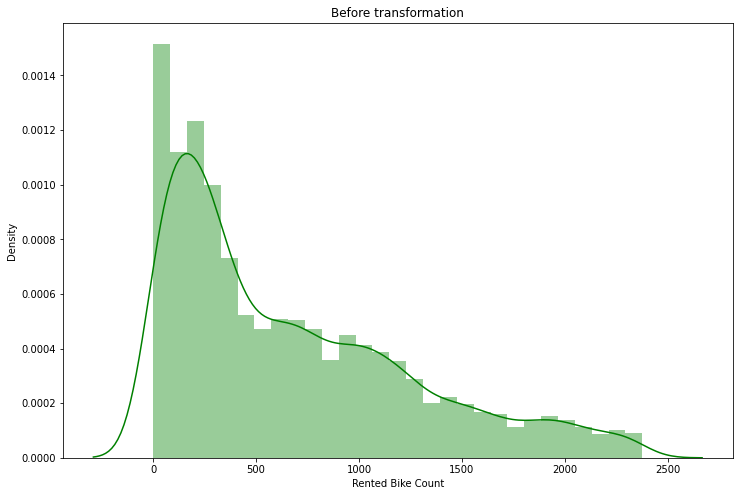

In [50]:
# Transform Your data
plt.figure(figsize=(12,8))
sns.distplot(enc_df['Rented Bike Count'],color="g")
plt.title('Before transformation')
plt.show()



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


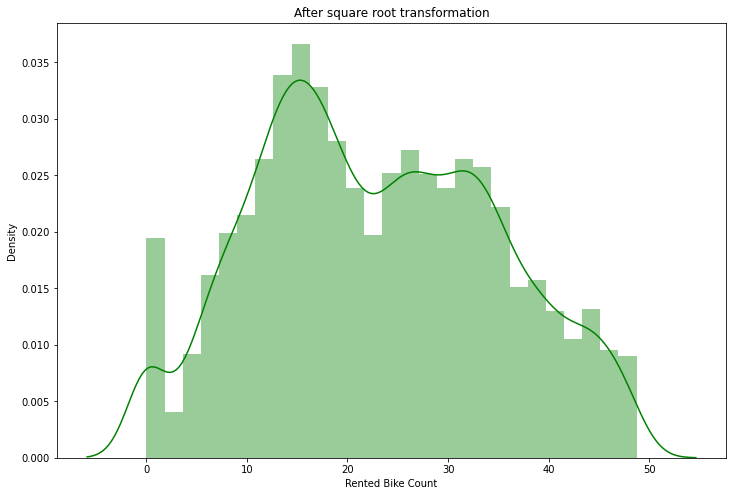

In [51]:
plt.figure(figsize=(12,8))
sns.distplot(np.sqrt(enc_df['Rented Bike Count']),color="g")
plt.title('After square root transformation')
plt.show()

In [52]:
y=np.sqrt(enc_df['Rented Bike Count'])# Applying square root transformation


Yes, the data needed to be transformed. I have used square root transformation for the dependent variable since it had some skewness as you can see from the above plots. I used this transformation so that the dependent variable resembles a normal distribution.

Square root transformation is used when there is light skewness in the distribution.



### 6. Data Scaling

In [53]:
# Scaling your data
# using minmax scaler to scale the independent variables
scaler = MinMaxScaler()
model=scaler.fit(enc_df[allfeatures])
X=model.transform(enc_df[allfeatures])
X

array([[0.22027972, 0.37755102, 0.31884058, ..., 0.        , 0.        ,
        0.        ],
       [0.21503497, 0.3877551 , 0.11594203, ..., 0.        , 0.        ,
        0.        ],
       [0.20629371, 0.39795918, 0.14492754, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.35664336, 0.39795918, 0.04347826, ..., 1.        , 0.        ,
        0.        ],
       [0.3479021 , 0.41836735, 0.14492754, ..., 0.        , 1.        ,
        0.        ],
       [0.34440559, 0.43877551, 0.1884058 , ..., 0.        , 0.        ,
        1.        ]])

##### Which method have you used to scale you data and why?

Scaling is used for making data points generalized so that the distance between them will be lower. 

I used Min Max scaler to scale my data since MinMaxScaler shrinks the data within a given range, usually of 0 to 1. 

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, in this case, I feel that dimensionality reduction is not needed. Dimensionality reduction  is used when there are too many features in a dataframe.
In this case. I have not used it since the number of features are not that high. 


One disadvantage of dimensionality reduction is that some data may be lost due to it.

In [54]:
# DImensionality Reduction (If needed)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [55]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=enc_df[allfeatures]
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20, random_state = 0)  #Splitting
print(X_train.shape)
print(X_test.shape)

(6753, 51)
(1689, 51)


##### What data splitting ratio have you used and why? 

The ratio I have used is 80:20. Which means that 80% of the data is used for training and 20% of the data is used for testing. This is the most commonly used ratio for splitting the data. There does not seem to be a clear rule on what ratio is best or optimal for a given dataset, but using an 80:20 split is said to be a good bet.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the data is not imbalanced. Imbalanced dataset usually occurs in classification problems.

In [56]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [57]:
# ML Model - 1 Implementation

# Fit the Algorithm
reg=LinearRegression() 
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

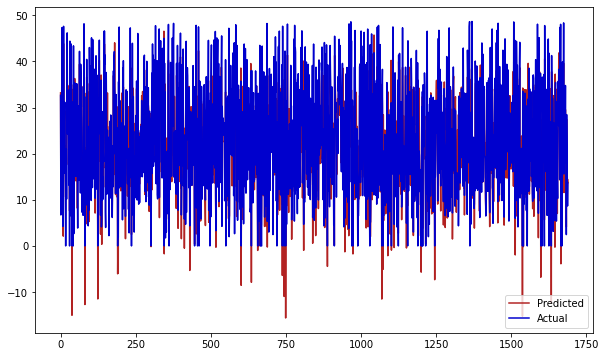

In [58]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,6))
plt.plot(y_pred,color='firebrick')
plt.plot(np.array(y_test),color='mediumblue')
plt.legend(["Predicted","Actual"])
plt.show()

In [59]:
r2 = r2_score((y_test), (y_pred))
print('R2:',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("MAE: ", mae(y_test,y_pred))


R2: 0.7626412266265183
Adjusted R2 :  0.7552464206142718
MSE : 33.88747574312986
RMSE : 5.821295022856157
MAE:  4.398558055895357


For the first model, I used a standard linear regression model wihout tuning any hyperparameters. The performance of the model is satisfactory. 

### ML Model - 2 Lasso Regression.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model I used below is a Lasso regularized Regression model. It is also called as L1 regularization. It stands for Least Absolute Shrinkage and Selection Operator. 

It adds a penalty that is equal to the absolute value of the magnitude of the coefficient. Due to this, some model coefficients will become zero and get eliminated from the model.

Regularization helps to avoid overfitting of the data.



In [60]:
# ML Model - 3 Implementation
lasso=Lasso(alpha=0.1,max_iter=3000)
# Fit the Algorithm
lasso.fit(X_train,y_train)
# Predict on the model
ypredl=lasso.predict(X_test)

In [61]:
# Visualizing evaluation Metric Score chart
r2 = r2_score((y_test), (ypredl))
print('R2:',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(ypredl)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test, ypredl)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("MAE: ", mae(y_test,ypredl))


R2: 0.722069543278173
Adjusted R2 :  0.7134107446875724
MSE : 39.67985457869814
RMSE : 6.299194756371495
MAE:  4.8424806123216735


#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)
# Predict on the model
y_pred_lasso=lasso_regressor.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.348e+04, tolerance: 6.454e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.328e+04, tolerance: 6.417e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.473e+04, tolerance: 6.513e+01

In [63]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -34.155951945352975


In [64]:
r2 = r2_score((y_test), (y_pred_lasso))
print('R2:',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("MAE: ", mae(y_test,y_pred_lasso))


R2: 0.7626469891350846
Adjusted R2 :  0.7552523626512051
MSE : 33.88665303551944
RMSE : 5.821224358802832
MAE:  4.398482074048917


##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross Validation to get the best value for alpha, and in this case, the value I got is 0.0001. It is called Grid Search, because it searches for the best set of hyperparameters from a grid of hyperparameters values and gives us the optimal value. 


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes I have seen an improvement

R2: Changed from 0.722069543278173 to 0.7626469891350846

Adjusted R2 : Changed from 0.7134107446875724 to 0.7552523626512051

MSE :  Changed from 39.67985457869814 to 33.88665303551944


RMSE : Changed from 6.299194756371495 to 5.821224358802832


MAE:  Changed from 4.8424806123216735 to 4.398482074048917

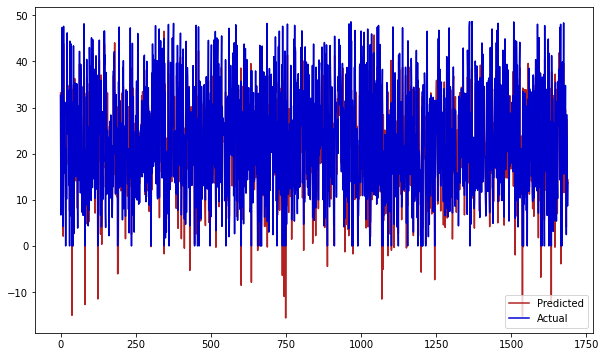

In [65]:
# Visualization
plt.figure(figsize=(10,6))
plt.plot(y_pred_lasso,color='firebrick')
plt.plot(np.array(y_test),color='mediumblue')
plt.legend(["Predicted","Actual"])
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

R2: (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable.

Adjusted R2: Calculates the R squared from only those variables whose addition in the model is significant. It also penalizes you for adding variables that do not improve the existing model.

MSE: The mean squared error (MSE) tells you how close a regression line is to a set of points. It is good to have lower MSE.

MAE: It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset.



### ML Model - 3 Ridge Regression

In [66]:
# ML Model - 3 Implementation
ridge  = Ridge(alpha=0.1)

# Fit the Algorithm
ridge.fit(X_train,y_train)
# Predict on the model
y_pred_r = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
The model I used below is a Ridge regularized Regression model. It is also called as L2 regularization. Ridge regression shrinks all regression coefficients towards zero but does not reach 0.

It is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.



In [67]:
# Visualizing evaluation Metric Score chart
r2 = r2_score((y_test), (y_pred_r))
print('R2:',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test,y_pred_r)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("MAE: ", mae(y_test,y_pred_r))


R2: 0.7626400297132181
Adjusted R2 :  0.7552451864116752
MSE : 33.88764662525002
RMSE : 5.82130970016628
MAE:  4.398634347211549


#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)
# Predict on the model
y_pred_ridge=ridge_regressor.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.74403e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.26341e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.15371e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.75321e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

In [69]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -34.15446254534856


In [70]:
r2 = r2_score((y_test), (y_pred_ridge))
print('R2:',r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

print("MAE: ", mae(y_test,y_pred_ridge))

R2: 0.762625478563748
Adjusted R2 :  0.7552301819276765
MSE : 33.88972407837169
RMSE : 5.821488132631698
MAE:  4.399340115609134


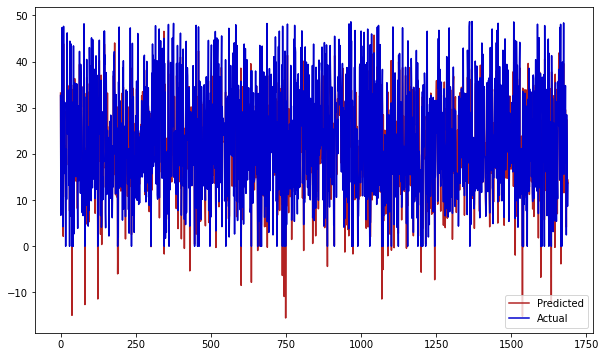

In [71]:
plt.figure(figsize=(10,6))
plt.plot(y_pred_ridge,color='firebrick')
plt.plot(np.array(y_test),color='mediumblue')
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross Validation to get the best value for alpha, and in this case, the value I got is 1. It is called Grid Search, because it searches for the best set of hyperparameters from a grid of hyperparameters values and gives us the optimal value.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there has not been an improvement. The values have pretty much stayed the same even after using Grid Search CV




R2: 0.7626400297132181 changed to 0.762625478563748

Adjusted R2 :  0.7552451864116752 changed to 0.7552301819276765

MSE : 33.88764662525002 changed to 33.88972407837169

RMSE : 5.82130970016628 changed to 5.821488132631698

MAE:  4.398634347211549 changed to 4.399340115609134

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics I considered are:

R2, Adjusted R2, MSE, RMSE AND MAE,

R2- (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable.

Adjusted R2- Calculates the R squared from only those variables whose addition in the model is significant. It also penalizes you for adding variables that do not improve the existing model.

MSE: The mean squared error (MSE) tells you how close a regression line is to a set of points. It is good to have lower MSE.

MAE: It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The final prediction model I have chosen from the above created models is the LASSO regression model, with hyperparameter tuning using Grid Search CV, since it has the best values in terms of the metrics I have chosen, compared to the other models.

# **Conclusion**

In conclusion, some of the main insights I have found are :

# 1. **EDA:**


* Average number of bikes rented per hour by is highest during the summer season.

* The most number of bikes rented in a day was 36,149 and it happened on 13th June 2018.

*  The month of June had the most number of bikes rented whereas Jan had the least.

*  Only 3.5% of bikes were rented on non-holidays.

*  Most of the people prefer to ride bikes when the visibility is 2000.

*  The visibility is the highest during the Autumn season.



# 2. **Model Creation:**

I created 3 models, with the best one being the Lasso regression model in which I used Grid Search CV, in which I got an R2 score of 0.76 which is good. This is the model I would prefer to make predictions.


# 3. **Challenges faced :**

*   The pairplot computation time was slightly high.
*   New feature creation
*   Creating the best model.









 















### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***